<a href="https://colab.research.google.com/github/Kidchris/Lesson/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifer code for plants anomalies detection 
## This is the code that can may be in a raspderry pi for classifing plants
## The data is gathered from PlantVillage


## Importing essentials modules

In [ ]:
# importing modules 

import random
import os
import pickle
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Assining labels to corresponding index

In [ ]:
file = open("./PlantVillage-Dataset/labels.txt")
text = file.readlines()
french = [" ".join(i.split("_")) for i in text]
len(text)
labels = {}
for i, el in enumerate(text):
    labels[i] = el.strip()


## Gathering data and rearaging

In [ ]:
# Grabbing the data and loading them in numpy array

DATASET =  np.load("./data.npy", allow_pickle=True)

# paths = "/home/chris/Desktop/plants/PlantVillage-Dataset/data_distribution_for_SVM/"

# for sets in os.listdir(paths):
#     ttset = os.path.join(paths, sets)
#     if ttset.endswith(".txt"):
#         pass
#     else:
#         for classe in os.listdir(ttset):
#             clas = os.path.join(ttset, classe)
#             for files in os.listdir(clas):
#                 file = os.path.join(clas, files)
#                 tort = file.split("/")
#                 image = cv.imread(file, 0)
#                 image = cv.resize(image, (90, 90))
#                 DATASET.append([image, labels[int(tort[-2])]])

# ## Saving the data for future usage

# DATASET = np.array(DATASET, dtype="object")
# np.save("./data.npy", DATASET)

## Preview of one image

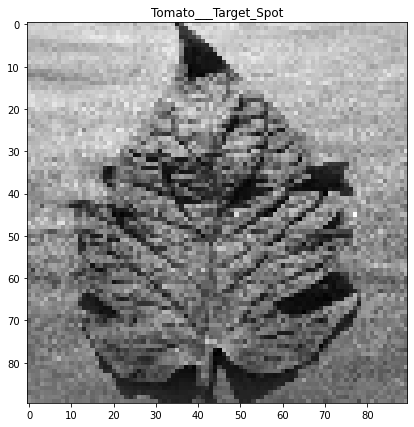

In [ ]:
plt.figure(figsize=(9,7))
plt.imshow(DATASET[-1][0], cmap="gray")
plt.title(f'{DATASET[-1][1]}')
plt.show()

## Converting data to ndarray and doing cat codes

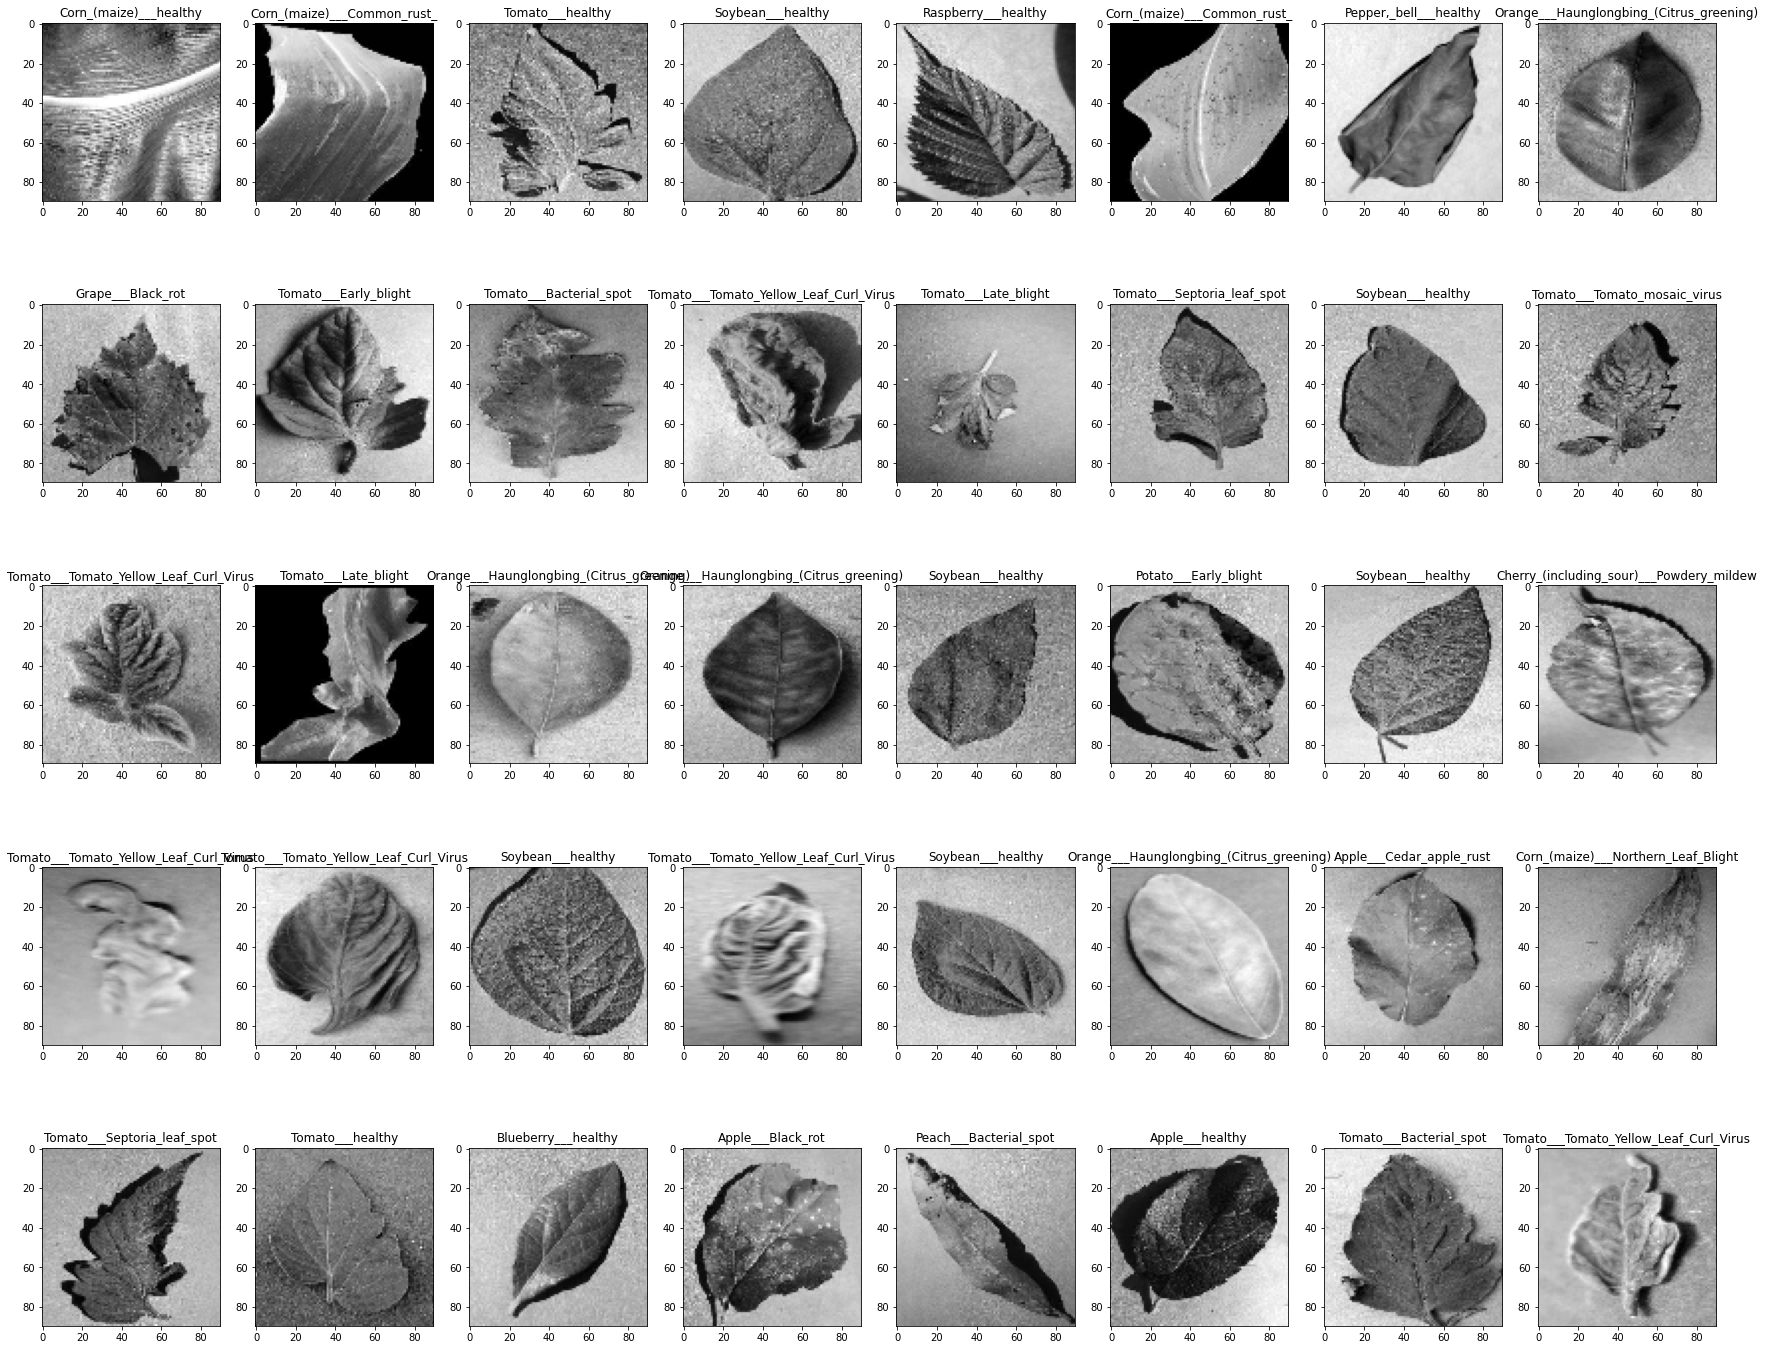

In [ ]:
DATASET
X = []
Y = []
for x,y in DATASET:
    X.append(x)
    Y.append(y)

## Preview

length = range(len(X))
plt.figure(figsize=(30, 25))

for nrows in range(1, 41):
    choice = random.choice(length)
    plt.subplot(5, 8, nrows)
    plt.imshow(X[choice], cmap="gray")
    plt.title(Y[choice])
    

X = np.array(np.array(X).reshape(-1, 90, 90, 1))
labels = np.array(pd.Series(Y).astype('category').cat.codes)

# Preprocessing data 

## Train test Split into Three sets

In [ ]:
X_train, XTestSet, y_train, y_Testlabels = train_test_split(X, labels, train_size=.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(XTestSet, y_Testlabels, train_size=.6, random_state=42)

### First processing ==> substract by 255

In [ ]:
X_train = X_train/255

## Convolution Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPool2D, Input, Activation, Conv2D, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add(Input(shape=(90,90,1)))
model.add(Conv2D(filters = 64 ,kernel_size = (5, 5), activation="relu"))
model.add(Conv2D(filters = 64 ,kernel_size = (5, 5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters= 32, kernel_size=(4, 4), activation="relu"))
model.add(Conv2D(filters= 32, kernel_size=(4, 4), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

# model.add(Conv2D(filters= 16, kernel_size=(3, 3), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters= 16, kernel_size=(2, 2), activation="relu"))
model.add(Conv2D(filters= 16, kernel_size=(2, 2), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters= 8, kernel_size=(2, 2), activation="relu"))
model.add(Conv2D(filters= 8, kernel_size=(2, 2), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters= 4, kernel_size=(2, 2), activation="relu"))
model.add(BatchNormalization())
# model.add(MaxPool2D())
# model.add(BatchNormalization())
# model.add()
# model.add()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(38, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 86, 86, 64)        1664      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 82, 82, 64)        102464    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 41, 41, 64)        256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 38, 38, 32)        32800     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 35, 35, 32)        16416     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 32)       

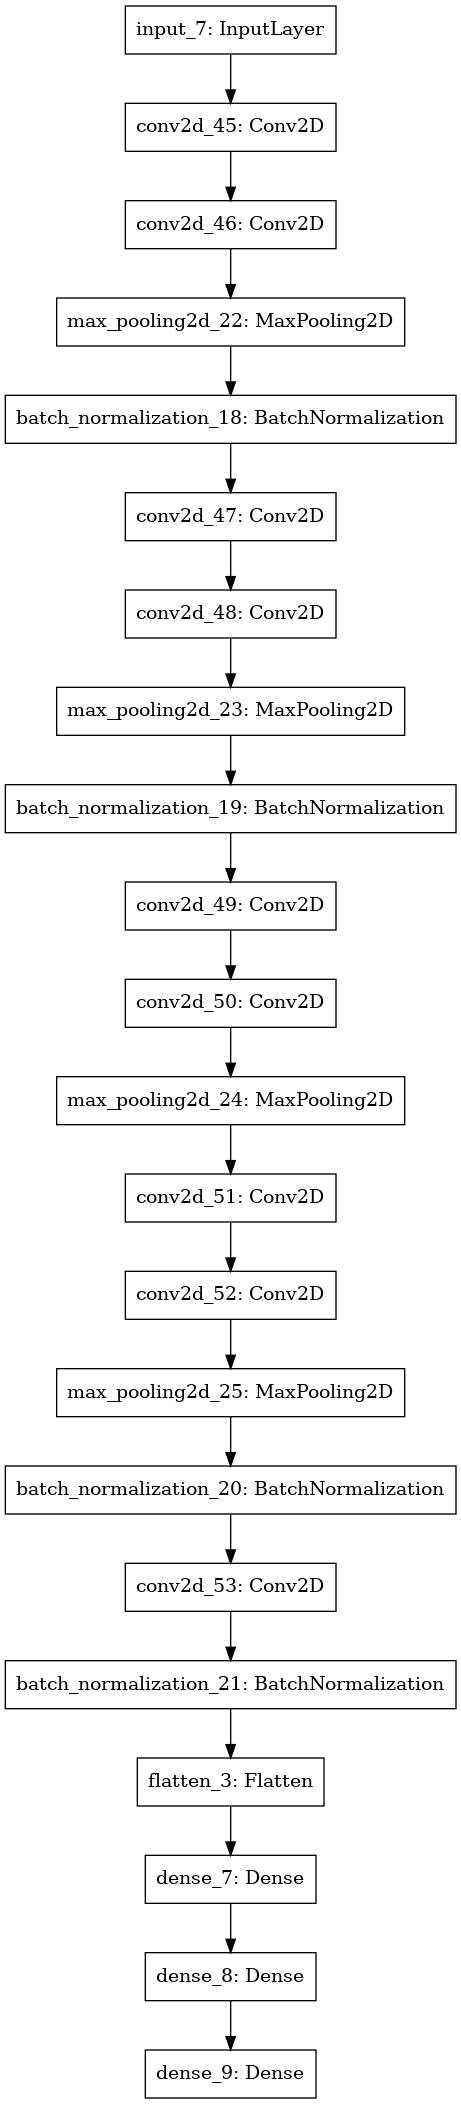

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="convenetClassifier.png")

In [ ]:
print(np.unique(labels))

In [ ]:
model.compile(  loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
                
history = model.fit(X_train, y_train, epochs=5)